模型容器

Containers分为：  
nn.Sequetial：按顺序包装多个网络层  
nn.ModuleList:像python的list一样包装多个网络层  
nn.ModuleDict:像python的dict一样包装多个网络层  


In [1]:
import torch
import torchvision
import torch.nn as nn
from collections import OrderedDict


In [2]:
class LeNetSequential(nn.Module):
    def __init__(self, classes):
        super(LeNetSequential, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, classes),
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size()[0], -1)
        x = self.classifier(x)
        return x


In [7]:
net_seq = LeNetSequential(classes=3)
fake_img = torch.randn((4, 3, 32, 32), dtype=torch.float32)
output_seq = net_seq(fake_img)
net_seq, output_seq

(LeNetSequential(
   (features): Sequential(
     (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
     (1): ReLU()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
     (4): ReLU()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Linear(in_features=400, out_features=120, bias=True)
     (1): ReLU()
     (2): Linear(in_features=120, out_features=84, bias=True)
     (3): ReLU()
     (4): Linear(in_features=84, out_features=3, bias=True)
   )
 ),
 tensor([[ 0.0078, -0.1147, -0.1551],
         [ 0.0062, -0.0785, -0.1262],
         [-0.0046, -0.0888, -0.1017],
         [ 0.0041, -0.0627, -0.1221]], grad_fn=<AddmmBackward>))

In [22]:
class LeNetSequentialOrderDict(nn.Module):
    def __init__(self, classes):
        super(LeNetSequentialOrderDict, self).__init__()
        self.features = nn.Sequential(OrderedDict({
            'conv1': nn.Conv2d(3, 6, 5),
            'relu1': nn.ReLU(inplace=True),
            'pool1': nn.MaxPool2d(kernel_size=2, stride=2),
            'conv2': nn.Conv2d(6, 16, 5),
            'relu2': nn.ReLU(inplace=True),
            'pool2': nn.MaxPool2d(kernel_size=2, stride=2),
        }))
        self.classifier = nn.Sequential(OrderedDict({
            'fc1': nn.Linear(16 * 5 * 5, 120),
            'relu3': nn.ReLU(),
            'fc2': nn.Linear(120, 84),
            'relu4': nn.ReLU(),
            'fc3': nn.Linear(84, classes),
        }))
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size()[0], -1)
        x = self.classifier(x)
        return x


In [24]:
net_seqord = LeNetSequentialOrderDict(classes=2)
output_seqord = net_seqord(fake_img)
net_seqord, output_seqord

(LeNetSequentialOrderDict(
   (features): Sequential(
     (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
     (relu1): ReLU(inplace=True)
     (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
     (relu2): ReLU(inplace=True)
     (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (fc1): Linear(in_features=400, out_features=120, bias=True)
     (relu3): ReLU()
     (fc2): Linear(in_features=120, out_features=84, bias=True)
     (relu4): ReLU()
     (fc3): Linear(in_features=84, out_features=2, bias=True)
   )
 ),
 tensor([[ 0.0502, -0.1164],
         [ 0.0511, -0.1235],
         [ 0.0556, -0.1147],
         [ 0.0428, -0.1091]], grad_fn=<AddmmBackward>))

nn.Sequential是nn.module的容器，用于按顺序包装一组网络层  
* 顺序性：各网络层之间严格按照顺序构建  
* 自带forward()：自带的forward里面，通过for循环依次执行前向传播运算


nn.ModuleList是nn.module的容器，用于包装一组网络层，以迭代方式调用网络层  
主要方法：  
* append():在ModuleList后面添加网络层  
* extend():拼接两个ModuleList  
* insert():指定在ModuleList中位置插入网络层

In [36]:
class ModuleList(nn.Module):
    def __init__(self):
        super(ModuleList, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for _ in range(20)])
        
    def forward(self, x):
        for i, linear in enumerate(self.linears):
            x = linear(x) 
        return x

In [37]:
net_list = ModuleList()
fake_data = torch.ones((10, 10))
output_list = net_list(fake_data)
net_list, output_list

(ModuleList(
   (linears): ModuleList(
     (0): Linear(in_features=10, out_features=10, bias=True)
     (1): Linear(in_features=10, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): Linear(in_features=10, out_features=10, bias=True)
     (5): Linear(in_features=10, out_features=10, bias=True)
     (6): Linear(in_features=10, out_features=10, bias=True)
     (7): Linear(in_features=10, out_features=10, bias=True)
     (8): Linear(in_features=10, out_features=10, bias=True)
     (9): Linear(in_features=10, out_features=10, bias=True)
     (10): Linear(in_features=10, out_features=10, bias=True)
     (11): Linear(in_features=10, out_features=10, bias=True)
     (12): Linear(in_features=10, out_features=10, bias=True)
     (13): Linear(in_features=10, out_features=10, bias=True)
     (14): Linear(in_features=10, out_features=10, bias=True)
     (15): Linear(in_features=10, out_fea

nn.ModuleDict是nn.module的容器，用于包装一组网络层，以索引方式调用网络层  
主要方法：  
* clear():清空ModuleDict  
* items():返回可迭代的键值对(key-value pairs)  
* keys():返回字典的键(key)  
* values():返回字典的值(value)  
* pop():返回一对键值，并从字典中删除  


In [42]:
class ModuleDict(nn.Module):
    def __init__(self):
        super(ModuleDict, self).__init__()
        self.choices = nn.ModuleDict({
            'conv': nn.Conv2d(10, 10, 3),
            'pool': nn.MaxPool2d(3),
        })
        
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'prelu': nn.PReLU(),
        })
    
    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activations[act](x)
        return  x

In [44]:
net_dic = ModuleDict()
fake_img = torch.randn((4, 10, 32, 32))
output = net_dic(fake_img, 'conv', 'relu')
net_dic

ModuleDict(
  (choices): ModuleDict(
    (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (activations): ModuleDict(
    (prelu): PReLU(num_parameters=1)
    (relu): ReLU()
  )
)

容器总结  
* nn.Sequential:顺序性，各网络层之间严格按顺序执行，常用于block构建  
* nn.ModuleList:迭代性，常用于大量重复网构建，通过for循环实现重复构建  
* nn.ModuleDict:索引性，常用于可选择的网络层

AlexNet  
1. 采用ReLu:替代饱和激活函数，减轻梯度消失  
2. 采用LRN（Local Response Normalization):对数据归一化，减轻梯度消失  
3. Dropout:提高全连接层的鲁棒性，增加网络的泛化能力  
4. Data Augmentation:TenCrop,色彩修改

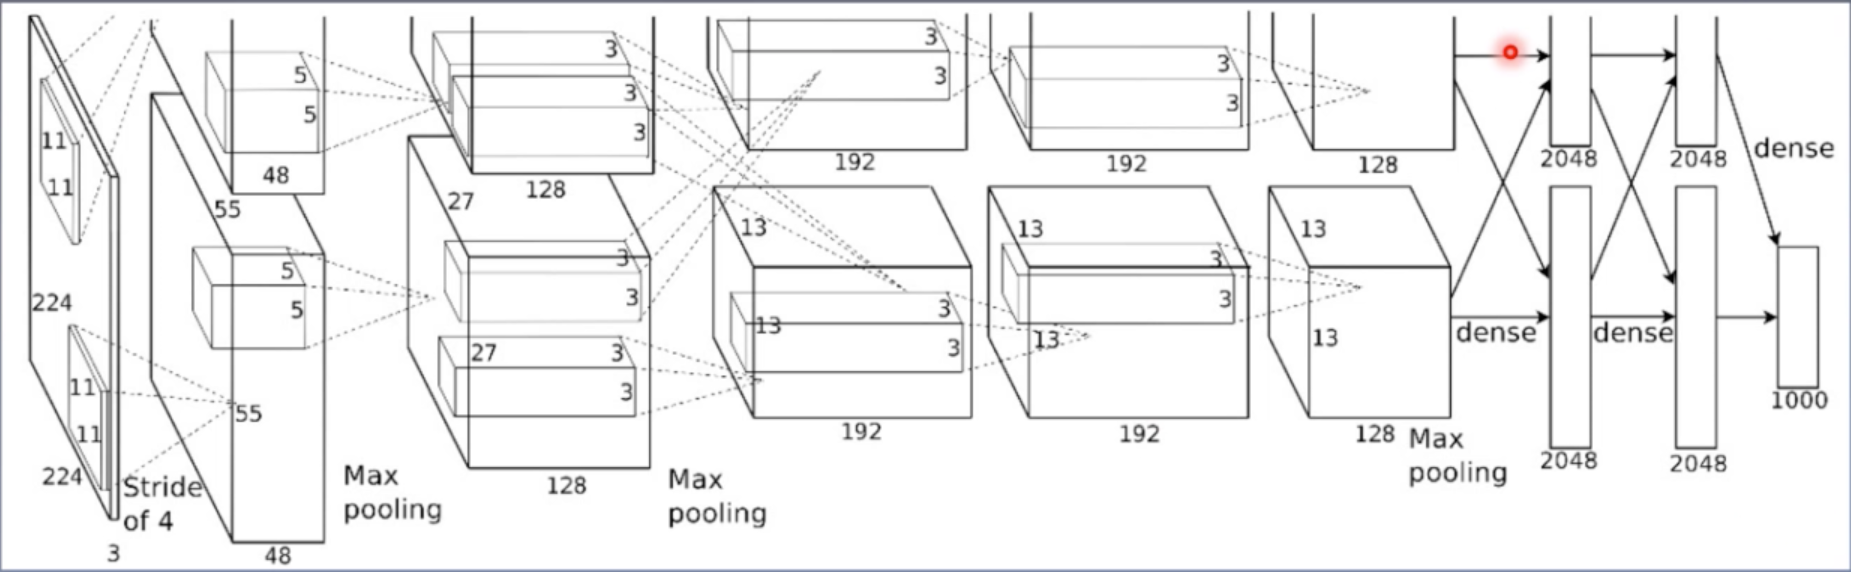

In [47]:
from IPython.display import Image
Image(filename= '/Users/chenmengda/深度之眼/pytorch/pytorch_code/lesson3/AlexNet.png')

In [50]:
alexnet = torchvision.models.AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 